<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/mod3/HW_stokes21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sympy import Curve, line_integrate, ln, E
import sympy as sym

sym.init_printing()

In [130]:
x, y, z, r, theta, t = sym.symbols('x y z r theta, t')

In [131]:
def curl_calc(P, Q, R):
  dRy = sym.diff(R, y)
  dQz = sym.diff(Q, z)
  dRx = sym.diff(R, x)
  dPz = sym.diff(P, z)
  dQx = sym.diff(Q, x)
  dPy = sym.diff(P, y)
  curl = [dRy - dQz, -(dRx - dPz), dQx - dPy]
  return curl

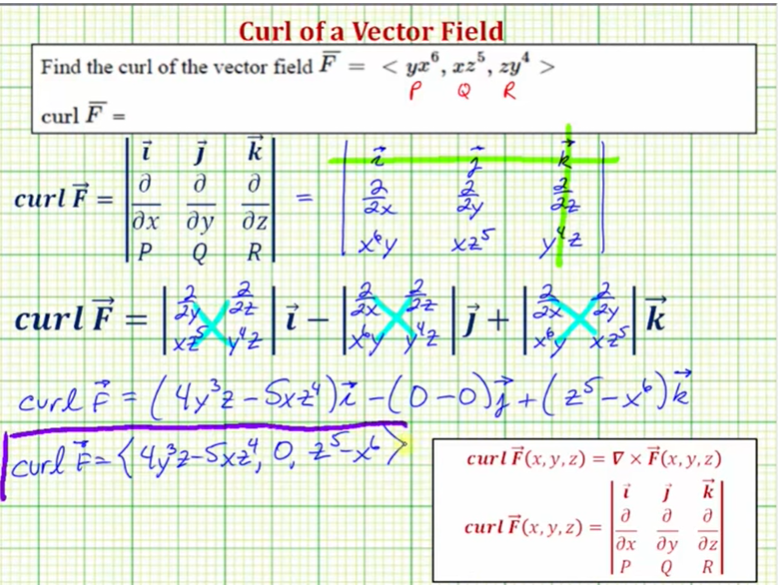

# Plotter

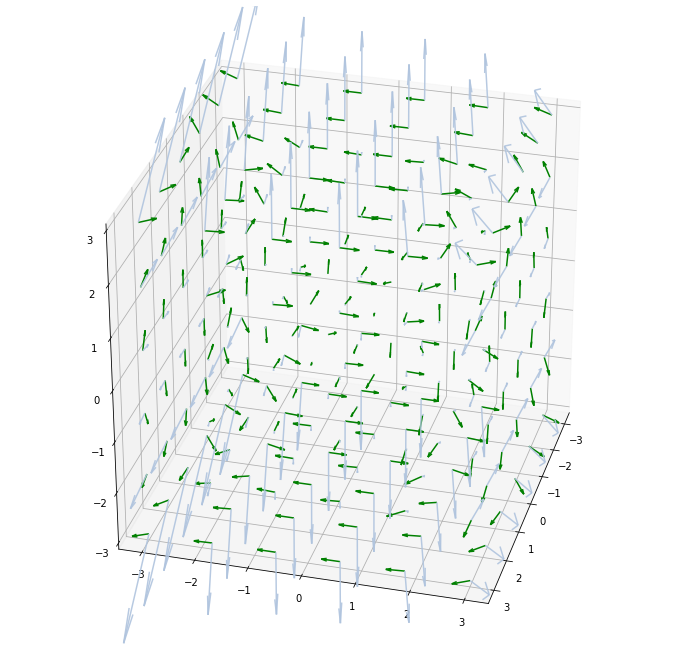

In [67]:
# Plotting
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

# Set parameters
vrange = [-3, 3]
zrange = [-3, 3]
N = 6
# Surface param
Urange = [-3, 3]
Vrange = [-4, 4]

# Make data
vals = np.linspace(vrange[0], vrange[1], N)
zvals = np.linspace(zrange[0], zrange[1], N)
X,Y,Z = np.meshgrid(vals, vals, zvals)

# Define vector field components
U = Y*X**2
V = X*Z**5
W = Z*Y**4
# Plot vector field
ax.quiver(X,Y,Z,U,V,W, length=0.35, normalize=True, colors='g')

# Plot curl
I = 4*Y**3*Z
J = 0
K = -X**2 + Z**5
ax.quiver(X,Y, Z, I, J, K, length=0.005, normalize=False, colors='lightsteelblue', alpha=0.9)

ax.azim = 15
# # Make surface data
# Su_vals = np.linspace(Srange[0], Srange[1])
# Sv_vals = np.linspace(Vrange[0], Vrange[1])
# SU, SV = np.meshgrid(Su_vals, Sv_vals)
# # Define surface
# SX = 
# SY = SU*np.sin(SV)
# SZ = SV
# # Plot surface
# surf = ax.plot_surface(SX, SY, SZ, color='lightsteelblue')

plt.show()

### Question 1

In [69]:
F = [y*x**2, x*z**5, z*y**4]

P, Q, R = [f for f in F]
display(P, Q, R)

In [70]:
curlF(P, Q, R)

### Question 2

In [71]:
F = [3*z*sym.cos(x), 2*z*sym.sin(x), 5*z]

P, Q, R = [f for f in F]
display(P, Q, R)

In [72]:
curlF(P, Q, R)

### Question 3 Stoke's Theorem

$$ \oint \limits_C \vec{F} \cdot d \vec{r} = \iint\limits_S ( \nabla \times \vec{F}) \cdot \vec{N} \ dS = \iint \limits_S (curl \vec{F} \cdot \vec{N}) \ dS $$

In [73]:
F = [-y*z, x*z, x*y]

zplane = 0

rt = [sym.cos(t), sym.sin(t), zplane]

r_prime_t = sym.Matrix([sym.diff(r) for r in rt])

Ft = sym.Matrix([s.subs([(x, rt[0]), (y, rt[1]), (z, rt[2])]) for s in F])

F, Ft, rt, r_prime_t

⎛                  ⎡      0      ⎤                       ⎡-sin(t)⎤⎞
⎜                  ⎢             ⎥                       ⎢       ⎥⎟
⎜[-y⋅z, x⋅z, x⋅y], ⎢      0      ⎥, [cos(t), sin(t), 0], ⎢cos(t) ⎥⎟
⎜                  ⎢             ⎥                       ⎢       ⎥⎟
⎝                  ⎣sin(t)⋅cos(t)⎦                       ⎣   0   ⎦⎠

In [74]:
int_S = Ft.dot(r_prime_t)
int_S

In [75]:
sol = sym.integrate(int_S, (t, 0, 2*sym.pi))
sol

### Question 4:


In [76]:
F = [x**2*sym.E**(y*z), x*sym.E**(x*z), z**2*sym.E**(x*y)]

r = 6

rt = [r*sym.cos(t), r*sym.sin(t), 0]

r_prime_t = sym.Matrix([sym.diff(r) for r in rt])

Ft = sym.Matrix([s.subs([(x, rt[0]), (y, rt[1]), (z, rt[2])]) for s in F])

F, Ft, rt, r_prime_t

⎛                            ⎡      2   ⎤                                     
⎜                            ⎢36⋅cos (t)⎥                           ⎡-6⋅sin(t)
⎜⎡ 2  y⋅z     x⋅z   2  x⋅y⎤  ⎢          ⎥                           ⎢         
⎜⎣x ⋅ℯ   , x⋅ℯ   , z ⋅ℯ   ⎦, ⎢ 6⋅cos(t) ⎥, [6⋅cos(t), 6⋅sin(t), 0], ⎢6⋅cos(t) 
⎜                            ⎢          ⎥                           ⎢         
⎝                            ⎣    0     ⎦                           ⎣    0    

 ⎞
⎤⎟
⎥⎟
⎥⎟
⎥⎟
⎦⎠

In [77]:
int_S = Ft.dot(r_prime_t)
int_S

In [78]:
sol = sym.integrate(int_S, (t, 0, 2*sym.pi))
display(sol)
sol.evalf()

### Question 5

In [87]:
F = [x*y*z, x*y, x**2*y*z]
F

In [132]:
P, Q, R = [f for f in F]


curlF = sym.Matrix(curl_calc(P, Q, R))
curlF

⎡-2⋅z⎤
⎢    ⎥
⎢-2⋅x⎥
⎢    ⎥
⎣-2⋅y⎦

### Question 6

In [141]:
F = [4*x+y**2, 7*y + z**2, 6*z + x**2]
F

In [142]:
g = 5 - x - y
gx = sym.diff(g, x)
gy = sym.diff(g, y)

g, gx, gy

In [143]:
P, Q, R = [f for f in F]

curlF = sym.Matrix(curl_calc(P, Q, R))
curlF

⎡-2⋅z⎤
⎢    ⎥
⎢-2⋅x⎥
⎢    ⎥
⎣-2⋅y⎦

In [144]:
curlF = curlF.subs(z, g)
dS = sym.Matrix([-gx, -gy, 1])

curlF, dS

⎛⎡2⋅x + 2⋅y - 10⎤  ⎡1⎤⎞
⎜⎢              ⎥  ⎢ ⎥⎟
⎜⎢     -2⋅x     ⎥, ⎢1⎥⎟
⎜⎢              ⎥  ⎢ ⎥⎟
⎝⎣     -2⋅y     ⎦  ⎣1⎦⎠

In [145]:
int_R = curlF.dot(dS)
int_R

In [147]:
sol = sym.integrate(int_R, (x, 0, 5-y), (y, 0, 5))
sol

### Question 7

In [148]:
F = [x*y, 7*z, 2*y]
F

In [155]:
g = y**2-x
gx = sym.diff(g, x)
gy = sym.diff(g, y)

g, gx, gy

In [156]:
P, Q, R = [f for f in F]

curlF = sym.Matrix(curl_calc(P, Q, R))
curlF

⎡-5⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣-x⎦

In [158]:
g = y**2 - x
gx = sym.diff(g, x)
gy = sym.diff(g, y)

g, gx, gy

In [159]:
dS = sym.Matrix([-gx, -gy, 1])

curlF, dS

⎛⎡-5⎤  ⎡ 1  ⎤⎞
⎜⎢  ⎥  ⎢    ⎥⎟
⎜⎢0 ⎥, ⎢-2⋅y⎥⎟
⎜⎢  ⎥  ⎢    ⎥⎟
⎝⎣-x⎦  ⎣ 1  ⎦⎠

In [160]:
int_R = curlF.dot(dS)
int_R

In [161]:
r, theta = sym.symbols('r theta')

In [163]:
sol = sym.integrate(r*int_R.subs(x, r*sym.cos(theta)), (r, 0, 6), (theta, 0, 2*sym.pi))
sol